In [77]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


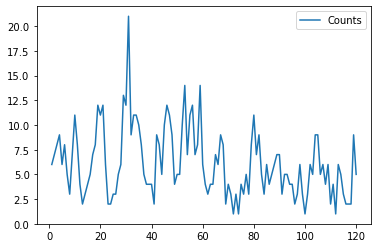

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv("trees.csv",index_col=[0])
df.plot()
plt.show()

In [87]:
n=len(df.values)
#Initialise order for INARMA(p,q)
q_init=2
p_init=4

#Initialise alpha_1,...,alpha_p,beta_1,...,beta_q,lambda
alpha=np.repeat(1/(p_init+1),p_init)
beta=np.repeat(1/(q_init+1),q_init)
lam=1

#Initalise augmented data
y=np.zeros([n,p_init],dtype=int)
v=np.zeros([n,q_init],dtype=int)
z= df.values.reshape([n,1])
x_data=df.values.astype(int)
init_order=[p_init,q_init]
init_augs=[y,v,z]
init_pars=[alpha,beta,lam]
#Set maximum order
p_max=4
q_max=4
order_max=[p_max,q_max]
N_reps=500

In [81]:
from INARMA_RJMCMC import inarma_rjmcmc


In [95]:
order_count, alphas,betas,lams =inarma_rjmcmc(x_data,init_augs,init_pars,init_order,order_max,N_reps)

Replication :  100
Replication :  200
Replication :  300
Replication :  400
Replication :  500


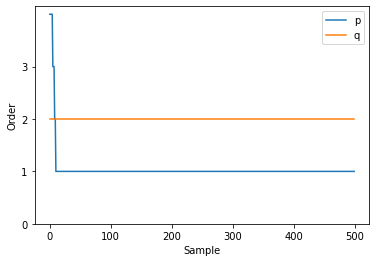

In [96]:
# plot order
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(order_count)
ax.set(title='', ylabel='Order', xlabel='Sample')
ax.legend(labels = ["p","q"])
ax.yaxis.set(ticks=range(0,max(p_max,q_max)))
plt.show()

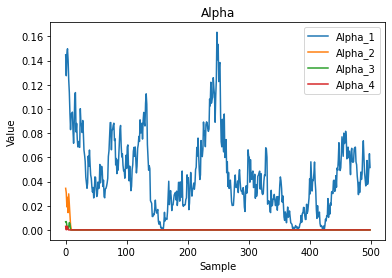

In [97]:

# plot alpha
max_p = max(order_count[0,])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(alphas)
ax.set(title='Alpha', ylabel='Value', xlabel='Sample')

alpha_lab=[]
for i in range(0,max_p): alpha_lab.append("Alpha_%i" %(i+1) )
ax.legend(loc = "best",labels = alpha_lab)
plt.show()

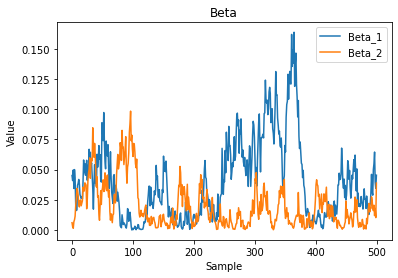

In [98]:
# plot beta
max_q = max(order_count[1,])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(betas)
ax.set(title='Beta', ylabel='Value', xlabel='Sample')

beta_lab=[]
for i in range(0,max_p): beta_lab.append("Beta_%i" %(i+1) )
ax.legend(loc = "best",labels = beta_lab)
plt.show()

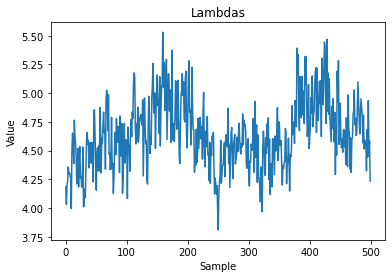

In [99]:
# plot lambda
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(lams)
ax.set(title='Lambdas', ylabel='Value', xlabel='Sample')
plt.show()